In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [2]:
# Parámetros del modelo
num_periodos = 100
poblacion_inicial = 10000
probabilidad_transicion = np.array([
    [0.9, 0.1, 0],  # De Suceptible a Suceptible, Infectado y Recuperado
    [0, 0.85, 0.15],  # De Infectado a Suceptible, Infectado y Recuperado
    [0.2, 0, 0.8]  # De Recuperado a Suceptible, Infectado y Recuperado
])

In [3]:
# Matrices para almacenar las poblaciones en cada estado en cada período
suceptibles = np.zeros(num_periodos + 1)
infectados = np.zeros(num_periodos + 1)
recuperados = np.zeros(num_periodos + 1)


In [4]:
# Población inicial en el estado Suceptible
suceptibles[0] = poblacion_inicial

In [5]:
probabilidad_transicion[2, 0]

0.2

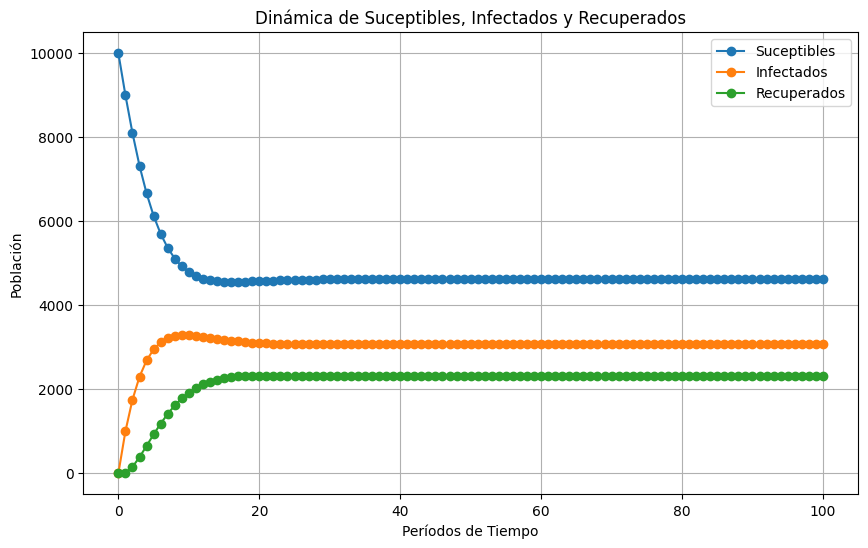

In [6]:

# Proyección de población para múltiples períodos
for t in range(num_periodos):
    suceptibles[t + 1] = (
        suceptibles[t] * probabilidad_transicion[0, 0] +
        infectados[t] * probabilidad_transicion[1, 0] +
        recuperados[t] * probabilidad_transicion[2, 0]
    )
    
    infectados[t + 1] = (
        suceptibles[t] * probabilidad_transicion[0, 1] +
        infectados[t] * probabilidad_transicion[1, 1] +
        recuperados[t] * probabilidad_transicion[2, 1]
    )
    
    recuperados[t + 1] = (
        suceptibles[t] * probabilidad_transicion[0, 2] +
        infectados[t] * probabilidad_transicion[1, 2] +
        recuperados[t] * probabilidad_transicion[2, 2]
    )

# Gráficos
periodos = np.arange(num_periodos + 1)
plt.figure(figsize=(10, 6))
plt.plot(periodos, suceptibles, label='Suceptibles', marker='o')
plt.plot(periodos, infectados, label='Infectados', marker='o')
plt.plot(periodos, recuperados, label='Recuperados', marker='o')
plt.xlabel('Períodos de Tiempo')
plt.ylabel('Población')
plt.title('Dinámica de Suceptibles, Infectados y Recuperados')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#En proporción

# Matrices para almacenar las proporciones en cada estado en cada período
proporciones_suceptibles = np.zeros(num_periodos + 1)
proporciones_infectados = np.zeros(num_periodos + 1)
proporciones_recuperados = np.zeros(num_periodos + 1)

# Proporción inicial en el estado Suceptible
proporciones_suceptibles[0] = 1.0

# Proyección de proporciones para múltiples períodos
for t in range(num_periodos):
    proporciones_suceptibles[t + 1] = (
        proporciones_suceptibles[t] * probabilidad_transicion[0, 0] +
        proporciones_infectados[t] * probabilidad_transicion[1, 0] +
        proporciones_recuperados[t] * probabilidad_transicion[2, 0]
    )
    
    proporciones_infectados[t + 1] = (
        proporciones_suceptibles[t] * probabilidad_transicion[0, 1] +
        proporciones_infectados[t] * probabilidad_transicion[1, 1] +
        proporciones_recuperados[t] * probabilidad_transicion[2, 1]
    )
    
    proporciones_recuperados[t + 1] = (
        proporciones_suceptibles[t] * probabilidad_transicion[0, 2] +
        proporciones_infectados[t] * probabilidad_transicion[1, 2] +
        proporciones_recuperados[t] * probabilidad_transicion[2, 2]
    )

# Gráficos

df = pd.DataFrame({
    'Períodos': np.arange(num_periodos + 1),
    'Suceptibles': proporciones_suceptibles,
    'Infectados': proporciones_infectados,
    'Recuperados': proporciones_recuperados
})

# Crear un gráfico de barras apiladas con Plotly Express
fig = px.line(df, x='Períodos', y=['Suceptibles', 'Infectados', 'Recuperados'],
             title='Dinámica de Suceptibles, Infectados y Recuperados (Proporciones)',
             labels={'value': 'Proporción sobre Población Inicial'},
             height=500)
fig.update_layout(barmode='relative')

# Mostrar el gráfico
fig.show()
